#MODELOS DE REGRESIÓN LINEAL

##MODELO CON DATOS SIMULADOS
  * y = a + b * x

  * x: 100 valores distribuidos siguiendo una N(1.5,2.5)

  * Ye: 5 + 1.9 * x + error

  * e estará distribuida según una N(0,0.8) 

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
#Recordemos que para generar una distribución aleatoria con media m y desviación típica s, hay que multiplicar la
#N(0,1) por la s y sumarle la m
x = 1.5 + 2.5 * np.random.randn(100)

In [186]:
res = 0 + 0.8 * np.random.randn(100)

In [187]:
y_pred = 5 + 1.9 * x

In [188]:
y_act = 5 + 1.9 * x + res

In [189]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [190]:
data = pd.DataFrame(
    {
        'x': x_list,
        'y_actual': y_act_list,
        'y_prediccion': y_pred_list
    }
)

In [191]:
data.head()

,x,y_actual,y_prediccion
0,0.914072,6.749782,6.736736
1,4.547021,13.700345,13.639340
2,-1.026951,3.460421,3.048792
3,0.401261,6.759028,5.762396
4,-0.202142,5.033044,4.615930


In [192]:
y_mean = [np.mean(y_act) for i in range(0,len(x_list))]
y_mean

[7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446436135,
 7.9713532446

Text(0.5, 1.0, 'Valor actual vs Predicción')

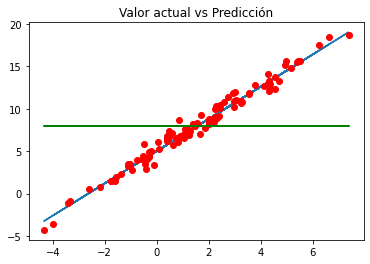

In [193]:
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],y_mean,'g')
plt.title('Valor actual vs Predicción')

In [194]:
data['SSR'] = (data['y_prediccion'] -  y_mean) ** 2
data['SSD'] = (data['y_prediccion'] - data['y_actual']) ** 2
data['SST'] = (data['y_actual'] - y_mean) ** 2

In [195]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.914072,6.749782,6.736736,1.524279,0.000170,1.492236
1,4.547021,13.700345,13.639340,32.126073,0.003722,32.821344
2,-1.026951,3.460421,3.048792,24.231604,0.169438,20.348514
3,0.401261,6.759028,5.762396,4.879492,0.993275,1.469733
4,-0.202142,5.033044,4.615930,11.258864,0.173984,8.633659


In [196]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
print(SSR)
print(SSD)
print(SST)

2034.0991919771934
47.360330080631755
2112.050428196985


In [197]:
SSR + SSD #tendría que ser igual a SST

2081.4595220578253

In [198]:
R2 = SSR/SST
R2

0.9630921519774804

(array([ 2.,  1.,  8.,  9., 20., 20., 17., 14.,  4.,  5.]),
 array([-2.02500135, -1.68009709, -1.33519282, -0.99028855, -0.64538429,
        -0.30048002,  0.04442425,  0.38932851,  0.73423278,  1.07913705,
         1.42404132]),
 <a list of 10 Patch objects>)

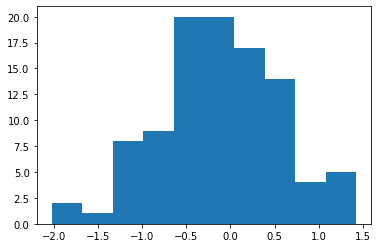

In [199]:
plt.hist(data['y_prediccion'] - data['y_actual'])

Obteniendo la recta de regresión a partir de los datos

y = a + b * x

b = covarianza / varianza

a = y_n - b * x_m

In [200]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean

(1.4954010409173173, 7.97135324464361)

In [201]:
data['beta_numerador'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)
data['beta_denominador'] = (data['x'] - x_mean) ** 2
beta = sum(data['beta_numerador'])/ sum(data['beta_denominador'])
alpha = y_mean - beta * x_mean
alpha, beta

(5.1063426423348925, 1.9158811074193491)

y = 5.151499121738837 + 1.9391305328769286 * x

Recordemos que el que habíamos supuesto al principio sera y = 5 + 1.9 * x

In [202]:
data['model'] = alpha + beta * data['x']
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_numerador,beta_denominador,model
0,0.914072,6.749782,6.736736,1.524279,0.000170,1.492236,0.710135,0.337944,6.857596
1,4.547021,13.700345,13.639340,32.126073,0.003722,32.821344,17.482705,9.312384,13.817894
2,-1.026951,3.460421,3.048792,24.231604,0.169438,20.348514,11.378162,6.362261,3.138826
3,0.401261,6.759028,5.762396,4.879492,0.993275,1.469733,1.326454,1.197142,5.875111
4,-0.202142,5.033044,4.615930,11.258864,0.173984,8.633659,4.987906,2.881653,4.719063


In [203]:
SSR_model = sum((data['model'] -  y_mean) ** 2)
SSD_model = sum((data['model'] - data['y_actual']) ** 2)
SST_model = sum((data['y_actual'] - y_mean) ** 2)
R2 = SSR_model/SST_model
R2

0.9784446605391097

Text(0.5, 1.0, 'Valor actual vs Predicción')

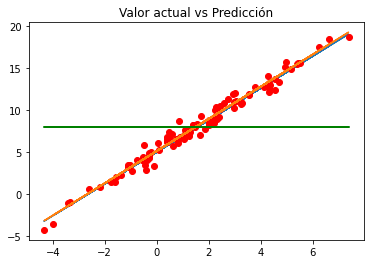

In [204]:
y_mean_array = [y_mean for i in range(0, len(data['x']))]
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],data['model'])
plt.plot(data['x'],y_mean_array,'g')
plt.title('Valor actual vs Predicción')

##ERROR ESTÁNDAR DE LOS RESIDUOS (RSE)

In [205]:
RSE = np.sqrt(SSD/(len(data)-1-1))
RSE

0.6951752831424322

In [206]:
y_mean

7.97135324464361

In [207]:
np.sqrt(sum(res**2)/(len(res)-1))

0.691655385673844